In [1]:
import pandas as pd
import geopandas as gpd
import libpysal as lp
import matplotlib.pyplot as plt
import rasterio as rio
import numpy as np
import contextily as ctx
import shapely.geometry as geom
import palettable as pltt
%matplotlib inline

In [2]:
df = gpd.read_file('airbnb/airbnb_Chicago 2015.shp')

In [3]:
df.head()

,community,shape_area,shape_len,AREAID,response_r,accept_r,rev_rating,price_pp,room_type,num_spots,...,crowded,dependency,without_hs,unemployed,income_pc,harship_in,num_crimes,num_theft,population,geometry
0,DOUGLAS,46004621.1581,31027.0545098,35,98.771429,94.514286,87.777778,78.157895,1.789474,38,...,1.8,30.7,14.3,18.2,23791,47,5013,1241,18238,POLYGON ((-87.60914087617012 41.84469250346108...
1,OAKLAND,16913961.0408,19565.5061533,36,99.200000,90.105263,88.812500,53.775000,1.850000,20,...,1.3,40.4,18.4,28.7,19252,78,1306,311,5918,"POLYGON ((-87.592152838785 41.81692934706861, ..."
2,FULLER PARK,19916704.8692,None,37,68.000000,NaN,91.750000,84.000000,1.833333,6,...,3.2,44.9,26.6,33.9,10432,97,1764,383,2876,POLYGON ((-87.62879823732874 41.80189303448802...
3,GRAND BOULEVARD,48492503.1554,28196.8371573,38,94.037037,83.615385,92.750000,119.533333,1.533333,30,...,3.3,39.5,15.9,24.3,23472,57,6416,1428,21929,POLYGON ((-87.60670812560372 41.81681377137391...
4,KENWOOD,29071741.9283,23325.1679062,39,92.542857,88.142857,90.656250,77.991453,1.615385,39,...,2.4,35.4,11.3,15.7,35911,26,2713,654,17841,"POLYGON ((-87.592152838785 41.81692934706861, ..."


In [4]:
pd.isnull(df['price_pp']).sum()

8

In [5]:
df = df
df['price_pp'].fillna((df['price_pp'].mean()), inplace=True)

In [6]:
import seaborn as sbn

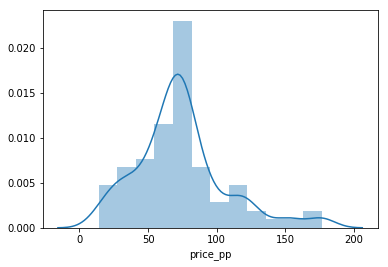

In [7]:
sbn.distplot(df['price_pp'])

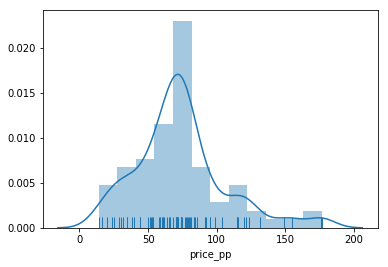

In [8]:
sbn.distplot(df['price_pp'], rug=True)

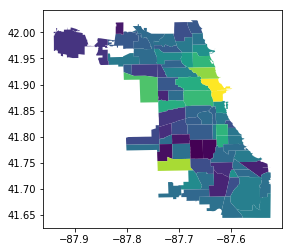

In [9]:
df.plot(column='price_pp')

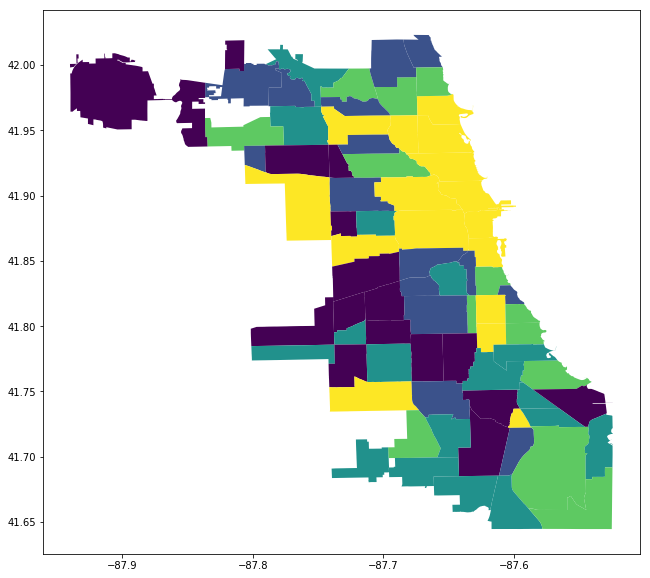

In [11]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='price_pp', scheme='Quantiles', ax=ax)

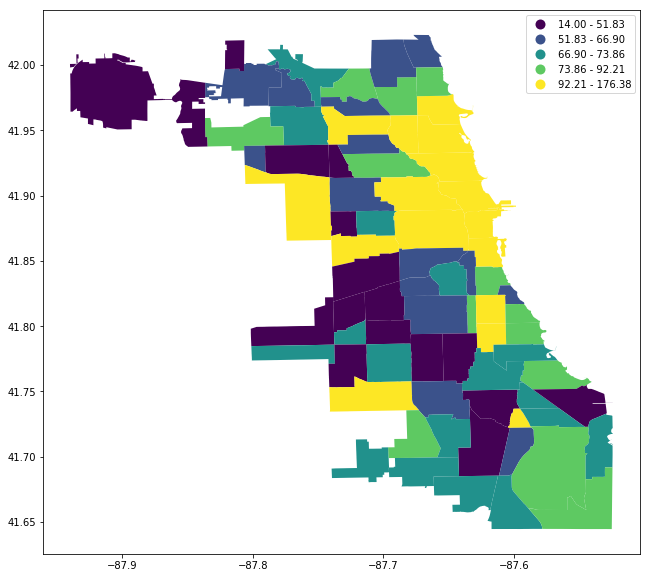

In [12]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='price_pp', scheme='Quantiles',  legend=True, ax=ax)

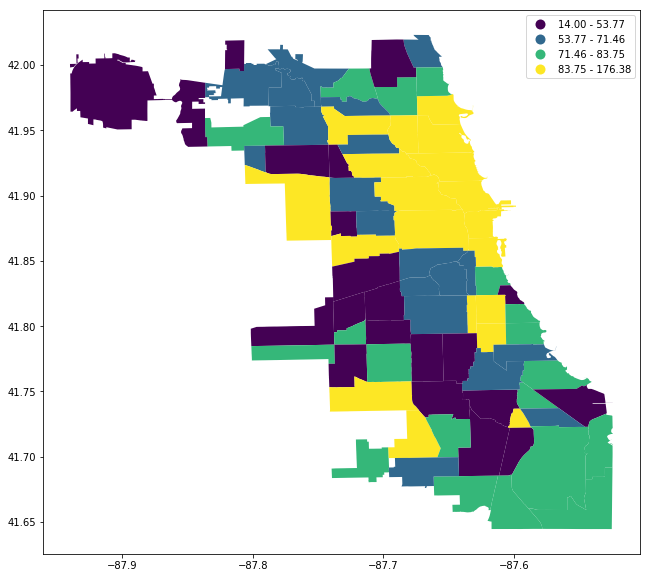

In [13]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='price_pp', scheme='Quantiles', k=4, legend=True, ax=ax)

In [61]:
wes = pltt.wesanderson.Darjeeling2_5.hex_colors
wes

['#D5E3D8', '#618A98', '#F9DA95', '#AE4B16', '#787064']

In [ ]:
from pltt.wesanderson.Darjeeling2_5 import hex_colors
ax.imshow(data, cmap=hex_colors.mpl_colormap)

In [65]:
ListedColormap(pltt.wesanderson.Darjeeling2_5)

NameError: name 'ListedColormap' is not defined

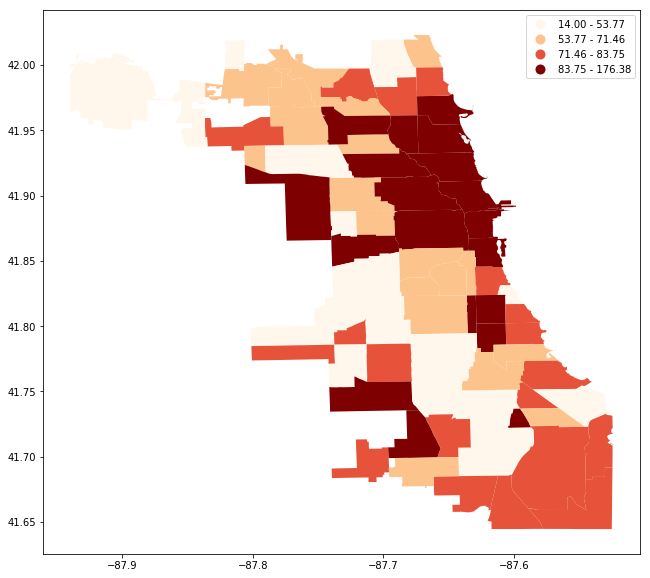

In [14]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='price_pp', scheme='Quantiles', k=4, legend=True, ax=ax, 
        cmap= 'OrRd')

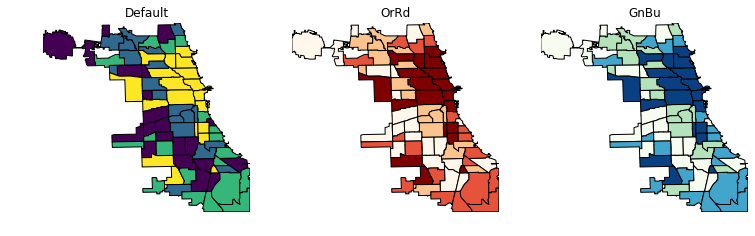

In [15]:
f,ax = plt.subplots(1,3,figsize=(3.16*4,4))
df.plot(column='price_pp', ax=ax[0], edgecolor='k',
        scheme="quantiles",  k=4)
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("Default")
df.plot(column='price_pp', ax=ax[1], edgecolor='k',
        scheme='quantiles', cmap='OrRd', k=4)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("OrRd")
df.plot(column='price_pp', ax=ax[2], edgecolor='k',
        scheme='quantiles', cmap='GnBu', k=4)
ax[2].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[2].set_title("GnBu")
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
plt.show()

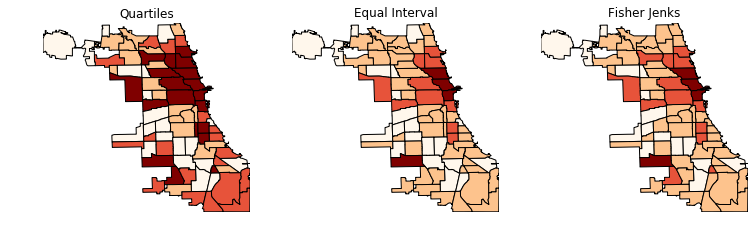

In [16]:
f,ax = plt.subplots(1,3,figsize=(3.16*4,4))
df.plot(column='price_pp', ax=ax[0], edgecolor='k',
        scheme="quantiles", cmap='OrRd', k=4)
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("Quartiles")
df.plot(column='price_pp', ax=ax[1], edgecolor='k',
        scheme='equal_interval', cmap='OrRd', k=4)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("Equal Interval")
df.plot(column='price_pp', ax=ax[2], edgecolor='k',
       scheme='fisher_jenks', cmap='OrRd', k=4)
ax[2].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[2].set_title("Fisher Jenks")
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
plt.show()

In [18]:
import mapclassify as mc

mc.CLASSFIERS

In [19]:
y = df['price_pp']
ea5 = mc.Equal_Interval(y, k=5)

ea5

In [20]:
ea5.yb

array([1, 1, 2, 3, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 0, 1,
       2, 1, 3, 3, 0, 1, 3, 3, 2, 0, 1, 2, 1, 1, 4, 4, 2, 0, 1, 0, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 3, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 4, 4, 1, 2, 1, 1, 1, 0, 1, 0])

In [21]:
q5 = mc.Quantiles(y, k=5)
q5

                Quantiles                 
 
 Lower            Upper              Count
          x[i] <=  51.833               16
 51.833 < x[i] <=  66.897               15
 66.897 < x[i] <=  73.864               17
 73.864 < x[i] <=  92.206               13
 92.206 < x[i] <= 176.376               16

In [22]:
q5.yb

array([3, 1, 3, 4, 3, 3, 4, 3, 2, 1, 1, 2, 3, 1, 2, 4, 3, 1, 0, 1, 0, 1,
       3, 1, 4, 4, 0, 2, 4, 4, 4, 0, 1, 4, 1, 1, 4, 4, 3, 0, 2, 0, 4, 2,
       0, 4, 1, 3, 2, 2, 2, 3, 0, 0, 0, 1, 4, 2, 1, 2, 0, 2, 0, 2, 0, 0,
       2, 4, 4, 1, 3, 2, 2, 2, 0, 3, 0])

In [23]:
y.shape

(77,)

In [24]:
np.unique(y).shape

(67,)

In [25]:
q5 = mc.Quantiles(y, k=5)
ei5 = mc.Equal_Interval(y, k=5)
mb5 = mc.Maximum_Breaks(y, k=5)
fj5 = mc.Fisher_Jenks(y, k=5)
fits = [c.adcm for c in [q5, ei5, mb5, fj5]]
fits

[598.0520588840582, 539.643737884058, 1096.390616884058, 488.9713821014492]

In [26]:
ht = mc.HeadTail_Breaks(y)
ht

             HeadTail_Breaks              
 
 Lower            Upper              Count
          x[i] <=  73.864               48
 73.864 < x[i] <=  98.160               16
 98.160 < x[i] <= 130.727                8
130.727 < x[i] <= 157.566                3
157.566 < x[i] <= 176.254                1
176.254 < x[i] <= 176.376                1

In [27]:
std = mc.Std_Mean(y)
std

                 Std_Mean                 
 
 Lower            Upper              Count
          x[i] <=   7.250                0
  7.250 < x[i] <=  40.557               12
 40.557 < x[i] <= 107.170               54
107.170 < x[i] <= 140.477                7
140.477 < x[i] <= 176.376                4

In [28]:
bp = mc.Box_Plot(y)
bp

                 Box Plot                 
 
 Lower            Upper              Count
          x[i] <=   8.812                0
  8.812 < x[i] <=  53.775               20
 53.775 < x[i] <=  71.458               19
 71.458 < x[i] <=  83.750               19
 83.750 < x[i] <= 128.713               14
128.713 < x[i] <= 176.376                5

In [29]:
bp

                 Box Plot                 
 
 Lower            Upper              Count
          x[i] <=   8.812                0
  8.812 < x[i] <=  53.775               20
 53.775 < x[i] <=  71.458               19
 71.458 < x[i] <=  83.750               19
 83.750 < x[i] <= 128.713               14
128.713 < x[i] <= 176.376                5

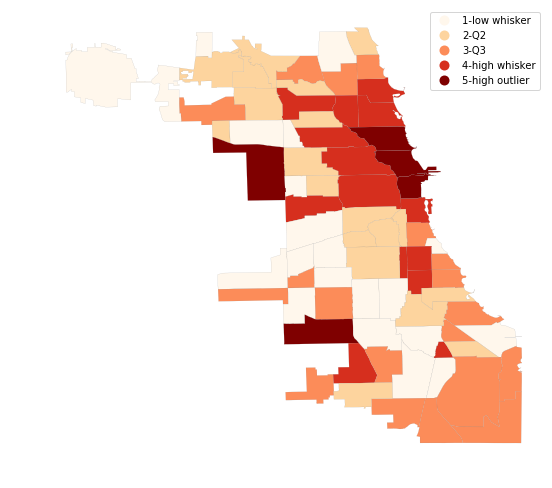

In [45]:
labels = ['0-low outlier', '1-low whisker',
          '2-Q2', '3-Q3', '4-high whisker', '5-high outlier']
bpl = [ labels[b] for b in bp.yb ]

f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=bpl).plot(column='cl', categorical=True, \
                                      k=4, cmap= 'OrRd', linewidth=0.1, ax=ax,\
                                      edgecolor='grey', legend=True)
ax.set_axis_off()
plt.show()

In [ ]:
# I found this tutorial particularly useful in explaining how to effectively visualize geospatial data in Python. The code/syntax is overall
# not too complicated, but I did encounter some errors when trying to change the color scheme using palettable. From my understanding, the
# defined variable 'wes' generates a list of the five hex colors from the Darjeeling2_5 color map. The error I kept encountering was that
# a 'list' is unshapable when I changed cmap to wes.I am not sure if I am supposed to assign each quartile level to each specific hex color,
# was still unsuccessful. I would be interested in seeing how this is accomplished. Overall, I thought this tutorial was very helpful in
# learning the steps to conducting some geospatial analysis and mapping in Python.

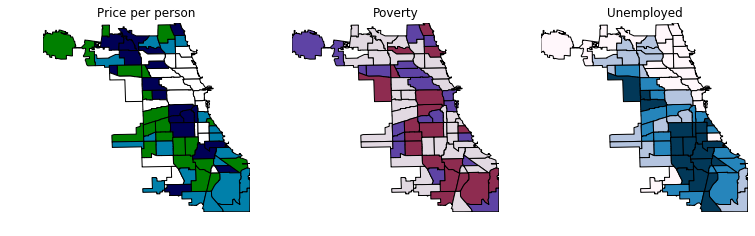

In [44]:
# I played with some of variables in the dataset and decided to look at price per person along with poverty levels and unemployment percetages
# Using Python to conduct geospatial analysis is convenient through Python in which you can simply take the variable of analysis and map it
# based on different schemes (quantiles, equal interval, Fisher jenks). The syntax reminds me of base R's "plot" command, which allows the
# user to layer code into one plot (code in subsequent order in terms of how you want it visualized).

f,ax = plt.subplots(1,3,figsize=(3.16*4,4))
df.plot(column='price_pp', ax=ax[0], edgecolor='k',
        scheme="quantiles", cmap='ocean', k=4)
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("Price per person")
df.plot(column='poverty', ax=ax[1], edgecolor='k',
        scheme='quantiles', cmap='twilight', k=4)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("Poverty")
df.plot(column='unemployed', ax=ax[2], edgecolor='k',
       scheme='quantiles', cmap='PuBu', k=4)
ax[2].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[2].set_title("Unemployed")
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
plt.show()